<a href="https://colab.research.google.com/github/PravalikaMuthoju/first/blob/main/shadow_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.The task at hand is to develop a practical solution for image tagging by training a straightforward model. This model should exhibit proficiency in categorizing images into elementary classes like "cat," "dog," "car," etc., employing prominent libraries such as TensorFlow or PyTorch. The overarching objective is to harness the power of machine learning to create an effective and accessible image classification system with real-world applicability across various domains and use cases.

In [ ]:
import os
with zipfile.ZipFile('/content/archive (14).zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/dataset')


base_dir = '/mnt/data/dataset'
print(os.listdir(base_dir))
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

if not os.path.exists(validation_dir):
    print("No validation directory found; using validation split.")
    use_validation_split = True
else:
    use_validation_split = False


['val', 'train.csv', 'val.csv', 'train']
No validation directory found; using validation split.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 if use_validation_split else 0.0
)

val_datagen = ImageDataGenerator(rescale=1./255)


if use_validation_split:
    train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
else:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )


Found 276 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7086 - loss: 0.6593 - val_accuracy: 0.7812 - val_loss: 0.5201
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8125 - loss: 0.4992 - val_accuracy: 1.0000 - val_loss: 0.1822
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8033 - loss: 0.5230 - val_accuracy: 0.8281 - val_loss: 0.5237
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.8500 - loss: 0.5095 - val_accuracy: 0.4000 - val_loss: 0.8578
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7789 - loss: 0.5261 - val_accuracy: 0.7812 - val_loss: 0.5465
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7812 - loss: 0.5458 - val_accuracy: 1.0000 - val_loss: 0.2389
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7836 - loss: 0.5342 - val_accuracy: 0.7969 - val_loss: 0.5135
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step - accuracy: 0.8125 - loss: 0.5134 - val_accuracy: 0.8000 - val_loss: 0.5095
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7957 - loss: 0.5213 - val_accuracy: 0.7969 - val_loss: 0.5242
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8438 - loss: 0.5056 - val_accuracy: 0.8000 - val_loss: 0.5020


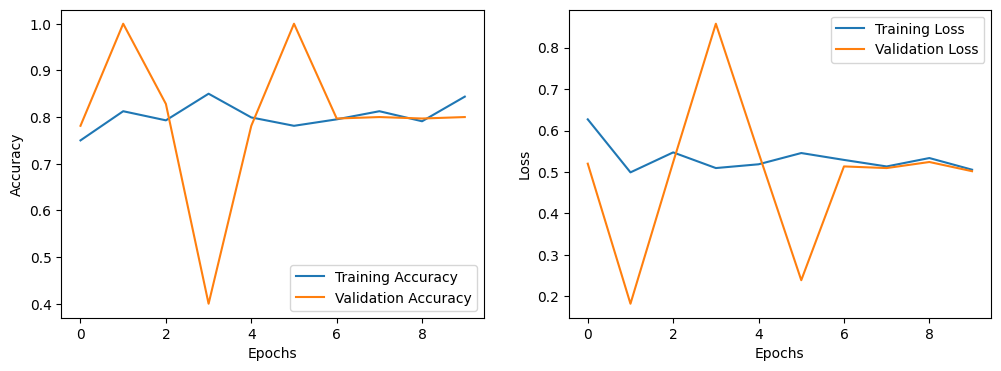

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model.save('/mnt/data/image_classification_model.h5')


In [ ]:
def predict_image(img_path, model):

    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    return predicted_class, confidence


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Set image dimensions
img_height, img_width = 150, 150
batch_size = 32


train_data_dir = 'path/to/train_data'
validation_data_dir = 'path/to/validation_data'

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


model.save('image_classification_model.keras')  # Adjust path as needed


def predict_image(img_path):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_class, confidence


img_path = 'path/to/catt.jpg'
predicted_class, confidence = predict_image(img_path)
print(f'Predicted Class: {predicted_class}, Confidence: {confidence}')
